# DEPRESYON ALT DALLARI (PMDD, DİSTİMİ)

## Veriseti Okuma

In [1]:
import pandas as pd
df = pd.read_csv("normal_disorder.csv")
df.head()

,text,labels
0,"Ben de fark ettim. Biraz kilo alıyorsun, değil...",Normal
1,"Sosyal anksiyete, genel anksiyete bozukluğu ve...",Disorder
2,"Bu konuyu düşünmek bile beni huzursuz ediyor, ...",Disorder
3,"Korkarım yapamaz Bay Croft, öğleden sonraya ka...",Normal
4,"Gençliğimden beri göbek deliği düşüncesi, için...",Disorder


## Veriseti inceleme

In [2]:
df.shape

(86063, 2)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86063 entries, 0 to 86062
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    86063 non-null  object
 1   labels  86063 non-null  object
dtypes: object(2)
memory usage: 1.3+ MB


In [10]:
import matplotlib.pyplot as plt

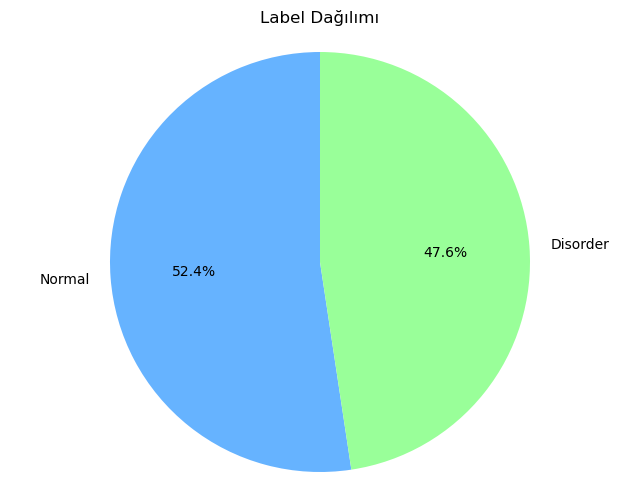

In [11]:
# 'label' kolonundaki dağılımı kontrol etme
label_counts = df['labels'].value_counts()

# Pasta grafiği oluşturma
plt.figure(figsize=(8, 6))
plt.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%', startangle=90, colors=['#66b3ff','#99ff99', '#ffcc99', '#ff6666', '#ffb3e6', '#c2c2f0', '#ffcc00', '#ff6666'])
plt.title('Label Dağılımı')
plt.axis('equal')  # Eşit orantılı grafik
plt.show()

### Veri Dağılımını Görme

Etiketlerin Dağılımı:
labels
Normal      45085
Disorder    40978
Name: count, dtype: int64


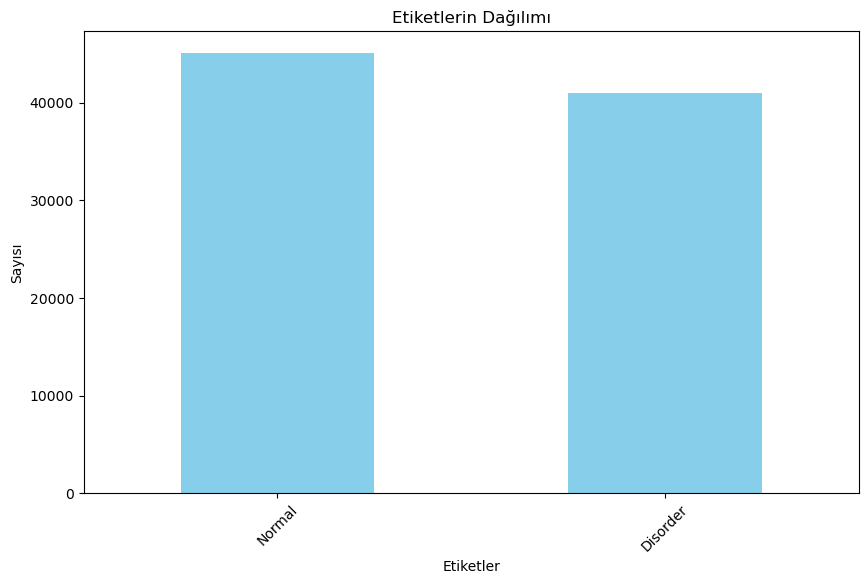

In [12]:
# 'label' sütunundaki etiketlerin sayısını alma
label_counts = df['labels'].value_counts()

# Etiketlerin dağılımını yazdırma
print("Etiketlerin Dağılımı:")
print(label_counts)

# Dağılımı görselleştirme (Bar chart)
plt.figure(figsize=(10, 6))
label_counts.plot(kind='bar', color='skyblue')
plt.title('Etiketlerin Dağılımı')
plt.xlabel('Etiketler')
plt.ylabel('Sayısı')
plt.xticks(rotation=45)
plt.show()

# Veri Temizliği ve Ön İşleme

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm 
import random
import string
import re
import nltk

nltk.download('stopwords')
nltk.download('words')
nltk.download('punkt')

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from nltk.corpus import words
from nltk.tokenize import word_tokenize

import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')  # For multilingual support if needed

import warnings
warnings.filterwarnings("ignore")


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\busra\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\busra\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\busra\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\busra\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\busra\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86063 entries, 0 to 86062
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    86063 non-null  object
 1   labels  86063 non-null  object
dtypes: object(2)
memory usage: 1.3+ MB


## Eksik verilerin temizlenmesi

In [15]:
# Eksik verileri kontrol edin
print(df.isnull().sum())

# Eksik verileri kaldırmak ya da doldurmak için:
df = df.dropna()  # Eksik verileri kaldırma (isteğe bağlı)


text      0
labels    0
dtype: int64


In [16]:
# Eksik verileri kaldırma
df = df.dropna()

# Eksik veri sonrası kontrol
print(df.isnull().sum())

text      0
labels    0
dtype: int64


## Emojileri Temizleme

In [17]:
import re

def clean_emojis(text):
    emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # Emoticons
        u"\U0001F300-\U0001F5FF"  # Symbols & Pictographs
        u"\U0001F680-\U0001F6FF"  # Transport & Map Symbols
        u"\U0001F700-\U0001F77F"  # Alchemical Symbols
        u"\U0001F780-\U0001F7FF"  # Geometric Shapes Extended
        u"\U0001F800-\U0001F8FF"  # Supplemental Arrows-C
        u"\U0001F900-\U0001F9FF"  # Supplemental Symbols & Pictographs
        u"\U0001FA00-\U0001FA6F"  # Chess Symbols
        u"\U0001FA70-\U0001FAFF"  # Symbols and Pictographs Extended-A
        u"\U00002702-\U000027B0"  # Dingbats
        u"\U000024C2-\U0001F251" 
        "]+", flags=re.UNICODE)
    
    return emoji_pattern.sub('', text)


## Regex ile Temizlik (Hashtag, E-posta, Link, Alıntılar)


In [18]:
def regex_processes(text):
    # Hashtagleri temizle
    text = re.sub(r'#\w+', '', text)

    # Alıntıları temizle (Çift tırnak içindeki metin)
    text = re.sub(r'"[^"]*"', '', text)
    
    # E-posta adreslerini temizle
    text = re.sub(r'\b[A-Za-z0-9._%+-]+@[A-Za-z0-9.-]+\.[A-Z|a-z]{2,}\b', '', text)

    # Linkleri (URL'leri) temizle
    text = re.sub(r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\\(\\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', '', text)

    # Yeni satır karakterlerini temizle
    text = text.replace('\n', ' ').replace('\r', ' ').replace('\t', ' ').replace('/n', ' ').replace('/r', ' ').replace('/t', ' ')

    return text


## Noktalama İşaretlerini Temizleme

In [19]:
import string

def clean_puncts(text):
    # Noktalama işaretlerini temizle
    translator = str.maketrans("", "", string.punctuation)
    return text.translate(translator)


## Stopwords (Durum Kelimeleri) Temizliği

In [20]:
import nltk
from nltk.corpus import stopwords

# nltk kütüphanesinin indirilen verileri (stopwords vb.) indir
nltk.download('stopwords')

# Türkçe stopwords listesi
def get_turkish_stopwords():
    stop_words = set(stopwords.words('turkish'))
    return stop_words

# Türkçe metin üzerinden stopword'leri temizleme fonksiyonu
def remove_stopwords(text):
    # Stopwords listesi al
    stop_words = get_turkish_stopwords()

    # Metni kelimelere ayır
    words = text.split()

    # Stopword'leri temizle
    filtered_words = [word for word in words if word.lower() not in stop_words]

    # Temizlenmiş kelimeler listesini döndür
    return filtered_words

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\busra\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Lemmatizasyon (Kök Hali)

In [21]:
from nltk.stem import WordNetLemmatizer

# Türkçe metin için lemmatizasyon
wordnet_lemmatizer = WordNetLemmatizer()

def lemmatize(text):
    tokens = word_tokenize(text)
    return [wordnet_lemmatizer.lemmatize(word) for word in tokens]  # Kelimeleri kök haline getir

## Genel Metin Temizleme

In [22]:
def clean_text(text):
    # Emojileri temizle
    text = clean_emojis(text)

    # Regex işlemleri (hashtag, e-posta, link vb.)
    text = regex_processes(text)

    # Noktalama işaretlerini temizle
    text = clean_puncts(text)

    # Stopwords temizliği
    filtered_words = remove_stopwords(text)

    # Lemmatizasyon
    lemmatized_tokens = lemmatize(' '.join(filtered_words))

    # Temizlenmiş metni döndür
    return ' '.join(lemmatized_tokens)


In [23]:
# Function to preprocess text
def preprocess_text(text):
    # Remove punctuation
    text = re.sub(r'[^\w\s]', '', text)
    
    # Tokenize text
    words = word_tokenize(text)
    # Convert to lowercase
    # words = [zeyrek.lemmatize(word.lower())[0][1][0] for word in words]

    words = [word.lower() for word in words]
    # Remove stopwords
    stop_words = set(stopwords.words('turkish'))
    words = [word for word in words if word not in stop_words]
    return words

In [24]:
# veri setindeki text sütununa temizlik işlemi uygula
df['cleaned_text'] = df['text'].apply(clean_text)
df.head()

,text,labels,cleaned_text
0,"Ben de fark ettim. Biraz kilo alıyorsun, değil...",Normal,Ben fark ettim Biraz kilo alıyorsun değil mi
1,"Sosyal anksiyete, genel anksiyete bozukluğu ve...",Disorder,Sosyal anksiyete genel anksiyete bozukluğu OKB...
2,"Bu konuyu düşünmek bile beni huzursuz ediyor, ...",Disorder,konuyu düşünmek bile beni huzursuz ediyor endi...
3,"Korkarım yapamaz Bay Croft, öğleden sonraya ka...",Normal,Korkarım yapamaz Bay Croft öğleden sonraya kad...
4,"Gençliğimden beri göbek deliği düşüncesi, için...",Disorder,Gençliğimden beri göbek deliği düşüncesi içine...


In [25]:
#tekrardan boş verinin olup olmadığına bakalım
# Eksik verileri kontrol edin
print(df.isnull().sum())

text            0
labels          0
cleaned_text    0
dtype: int64


In [26]:
from collections import Counter

In [28]:
all_words = []
for text in tqdm(df['cleaned_text']):
    words = preprocess_text(text)
    all_words.extend(words)

word_freq = Counter(all_words)
most_common_word = word_freq.most_common(200)

print("Most repetitive word:", most_common_word)
print("Frequency:", most_common_word)


100%|██████████████████████████████████████████████████████████████████████████| 86063/86063 [00:51<00:00, 1683.85it/s]


Most repetitive word: [('bir', 42673), ('beni', 8465), ('var', 8083), ('hissediyorum', 7821), ('kendimi', 7325), ('kadar', 6086), ('sadece', 5382), ('ben', 5226), ('zaman', 5155), ('iyi', 5012), ('olarak', 4612), ('gerçekten', 4508), ('kötü', 4139), ('bana', 4003), ('sonra', 3963), ('benim', 3692), ('evet', 3578), ('bile', 3410), ('olduğunu', 3143), ('sürekli', 3030), ('değil', 2973), ('gün', 2884), ('hiçbir', 2792), ('bunu', 2748), ('fazla', 2730), ('panik', 2714), ('mi', 2685), ('önce', 2661), ('yok', 2622), ('kesinlikle', 2570), ('istiyorum', 2540), ('ediyorum', 2446), ('zor', 2433), ('aynı', 2379), ('geliyor', 2353), ('son', 2258), ('şekilde', 2032), ('merhaba', 2018), ('büyük', 1948), ('olan', 1920), ('şimdi', 1914), ('biraz', 1910), ('harika', 1887), ('başka', 1882), ('ancak', 1871), ('artık', 1823), ('yardımcı', 1815), ('oldu', 1764), ('sosyal', 1744), ('bende', 1648), ('olmak', 1639), ('mücadele', 1634), ('hala', 1621), ('oluyor', 1606), ('yüzden', 1592), ('pmdd', 1589), ('kork

In [29]:
most_common_word

[('bir', 42673),
 ('beni', 8465),
 ('var', 8083),
 ('hissediyorum', 7821),
 ('kendimi', 7325),
 ('kadar', 6086),
 ('sadece', 5382),
 ('ben', 5226),
 ('zaman', 5155),
 ('iyi', 5012),
 ('olarak', 4612),
 ('gerçekten', 4508),
 ('kötü', 4139),
 ('bana', 4003),
 ('sonra', 3963),
 ('benim', 3692),
 ('evet', 3578),
 ('bile', 3410),
 ('olduğunu', 3143),
 ('sürekli', 3030),
 ('değil', 2973),
 ('gün', 2884),
 ('hiçbir', 2792),
 ('bunu', 2748),
 ('fazla', 2730),
 ('panik', 2714),
 ('mi', 2685),
 ('önce', 2661),
 ('yok', 2622),
 ('kesinlikle', 2570),
 ('istiyorum', 2540),
 ('ediyorum', 2446),
 ('zor', 2433),
 ('aynı', 2379),
 ('geliyor', 2353),
 ('son', 2258),
 ('şekilde', 2032),
 ('merhaba', 2018),
 ('büyük', 1948),
 ('olan', 1920),
 ('şimdi', 1914),
 ('biraz', 1910),
 ('harika', 1887),
 ('başka', 1882),
 ('ancak', 1871),
 ('artık', 1823),
 ('yardımcı', 1815),
 ('oldu', 1764),
 ('sosyal', 1744),
 ('bende', 1648),
 ('olmak', 1639),
 ('mücadele', 1634),
 ('hala', 1621),
 ('oluyor', 1606),
 ('yüzden

#  Veri Keşfi ve Analizi

## Etiket Dağılımı Analizi

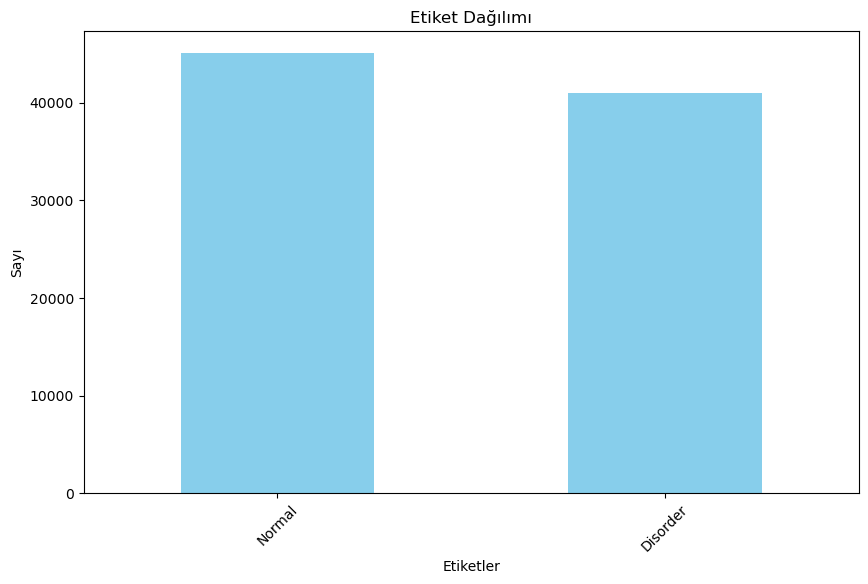

In [30]:

# Etiketlerin dağılımını görselleştirelim
plt.figure(figsize=(10,6))
df['labels'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Etiket Dağılımı')
plt.xlabel('Etiketler')
plt.ylabel('Sayı')
plt.xticks(rotation=45)
plt.show()

## Veri setindeki labels içeriğini düzeltme (Object halini silme)

In [45]:
depresyon['all_labels'].dtype

dtype('O')

In [49]:
depresyon['all_labels'] = depresyon['all_labels'].str.strip("[]")
depresyon.head()

,text,Distimi,PMDD,all_labels,cleaned_text
0,Beni affetmesini umuyorum.,0,1,NaN,Beni affetmesini umuyorum
1,Beynim her zaman şöyledir: “WhAt EvEn iS tHis ...,0,1,NaN,Beynim zaman şöyledir “ WhAt EvEn iS tHis PmdD...
2,"Sefaletin bir parçası olmayı öğrendim, ama bun...",0,1,NaN,Sefaletin bir parçası olmayı öğrendim bunun be...
3,"Umutsuzluk ve çaresizlik, ruhumu kemiriyordu, ...",1,0,NaN,Umutsuzluk çaresizlik ruhumu kemiriyordu kendi...
4,Bu hissin geçici olduğunu biliyorum ve bu beni...,0,1,NaN,hissin geçici olduğunu biliyorum beni endişele...


In [50]:
depresyon['all_labels'] = depresyon.apply(
    lambda row: 'PMDD' if row['PMDD'] == 1 else ('Distimi' if row['Distimi'] == 1 else ''),
    axis=1
)
depresyon.head()

,text,Distimi,PMDD,all_labels,cleaned_text
0,Beni affetmesini umuyorum.,0,1,PMDD,Beni affetmesini umuyorum
1,Beynim her zaman şöyledir: “WhAt EvEn iS tHis ...,0,1,PMDD,Beynim zaman şöyledir “ WhAt EvEn iS tHis PmdD...
2,"Sefaletin bir parçası olmayı öğrendim, ama bun...",0,1,PMDD,Sefaletin bir parçası olmayı öğrendim bunun be...
3,"Umutsuzluk ve çaresizlik, ruhumu kemiriyordu, ...",1,0,Distimi,Umutsuzluk çaresizlik ruhumu kemiriyordu kendi...
4,Bu hissin geçici olduğunu biliyorum ve bu beni...,0,1,PMDD,hissin geçici olduğunu biliyorum beni endişele...


## Kelime Bulutları (Word Cloud)

In [31]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


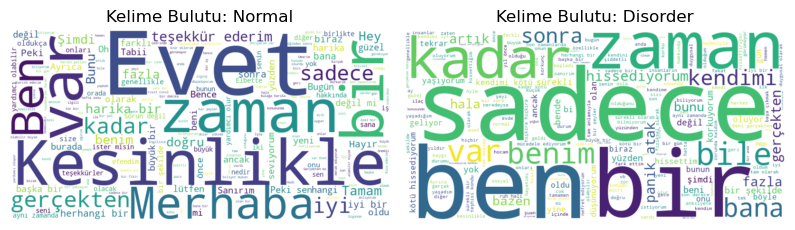

In [34]:
from wordcloud import WordCloud

# Her etikete göre kelime bulutları oluştur
labels = df['labels'].unique()

plt.figure(figsize=(12, 10))

for i, label in enumerate(labels, 1):
    plt.subplot(2, 3, i)  # 2 satır, 3 sütunlu bir grid
    subset = df[df['labels'] == label]['cleaned_text']
    text = ' '.join(subset)  # Metinleri birleştir
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Kelime Bulutu: {label}')

plt.tight_layout()
plt.show()


## Anahtar Kelime Tespiti

In [35]:
from sklearn.feature_extraction.text import TfidfVectorizer

# TF-IDF vektörleştiriciyi başlat
vectorizer = TfidfVectorizer(stop_words='english', max_features=10)

# Her etiket için anahtar kelimeleri belirleyelim
for label in labels:
    subset = df[df['labels'] == label]['cleaned_text']
    X = vectorizer.fit_transform(subset)
    
    # Anahtar kelimeleri yazdıralım
    feature_names = vectorizer.get_feature_names_out()
    tfidf_scores = X.sum(axis=0).A1  # TF-IDF skorlarını al
    word_scores = dict(zip(feature_names, tfidf_scores))
    
    print(f'\nAnahtar Kelimeler - {label}:')
    sorted_words = sorted(word_scores.items(), key=lambda x: x[1], reverse=True)
    for word, score in sorted_words[:10]:  # En yüksek 10 kelimeyi yazdır
        print(f'{word}: {score:.4f}')


Anahtar Kelimeler - Normal:
bir: 10549.4540
var: 2878.3582
evet: 2742.9303
kesinlikle: 1862.3500
iyi: 1644.9482
mi: 1616.0921
zaman: 1526.8945
merhaba: 1490.7841
harika: 1391.6372
ben: 1334.8238

Anahtar Kelimeler - Disorder:
bir: 11333.4091
beni: 4985.0118
hissediyorum: 4393.0237
kendimi: 4239.1076
kadar: 2726.6841
var: 2702.4742
sadece: 2484.7348
kötü: 2368.2827
olarak: 2214.7551
ben: 2101.4323


## Temizlenmiş Verileri csv olarak Kaydetme

In [36]:
# CSV olarak kaydetme
df.to_csv("normal_disorder_temizlenmis.csv", index=False)

print("Veri başarıyla 'normal_disorder_temizlenmis.csv' dosyasına kaydedildi.")

Veri başarıyla 'normal_disorder_temizlenmis.csv' dosyasına kaydedildi.


# MODEL

In [81]:
pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118

Looking in indexes: https://download.pytorch.org/whl/cu118Note: you may need to restart the kernel to use updated packages.



In [83]:
import torch
from transformers import BertTokenizer, BertForSequenceClassification
from torch.utils.data import DataLoader, Dataset
from torch.optim import AdamW
from sklearn.model_selection import train_test_split
from tqdm import tqdm

# 1. Veri seti ve sınıf ağırlıkları
class_weights = torch.tensor([0.5, 1.1, 2.3], dtype=torch.float)  # Normal, Depression, Anxiety
labels_mapping = {"Normal": 0, "Depression": 1, "Anxiety": 2}

# 2. Özel veri seti sınıfı
class CustomDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_length):
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_length = max_length

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        text = self.texts[idx]
        label = self.labels[idx]
        encoding = self.tokenizer(
            text,
            padding='max_length',
            truncation=True,
            max_length=self.max_length,
            return_tensors="pt"
        )
        return {
            'input_ids': encoding['input_ids'].squeeze(0),
            'attention_mask': encoding['attention_mask'].squeeze(0),
            'label': torch.tensor(label, dtype=torch.long)
        }

# 3. Veri setini yükleme ve ayrıştırma
texts = ank_dep['cleaned_text'].tolist()
labels = ank_dep['labels'].map(labels_mapping).tolist()

# Eğitim ve doğrulama setlerini ayırma
train_texts, val_texts, train_labels, val_labels = train_test_split(
    texts, labels, test_size=0.2, random_state=42, stratify=labels
)

# Tokenizer ve model
model_name = "dbmdz/bert-base-turkish-uncased"
tokenizer = BertTokenizer.from_pretrained(model_name)
model = BertForSequenceClassification.from_pretrained(model_name, num_labels=3)

# Dataset ve DataLoader
max_length = 128
train_dataset = CustomDataset(train_texts, train_labels, tokenizer, max_length)
val_dataset = CustomDataset(val_texts, val_labels, tokenizer, max_length)

train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=16)

# 4. Model eğitimi
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

optimizer = AdamW(model.parameters(), lr=5e-5)
loss_fn = torch.nn.CrossEntropyLoss(weight=class_weights.to(device))

# Eğitim döngüsü
epochs = 3
for epoch in range(epochs):
    model.train()
    total_loss = 0
    for batch in tqdm(train_loader, desc=f"Epoch {epoch + 1} Training"):
        optimizer.zero_grad()
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['label'].to(device)

        outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
        loss = loss_fn(outputs.logits, labels)
        total_loss += loss.item()

        loss.backward()
        optimizer.step()

    avg_loss = total_loss / len(train_loader)
    print(f"Epoch {epoch + 1}, Training Loss: {avg_loss:.4f}")

# 5. Doğrulama
model.eval()
val_loss = 0
correct = 0
total = 0
with torch.no_grad():
    for batch in tqdm(val_loader, desc="Validation"):
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['label'].to(device)

        outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
        loss = loss_fn(outputs.logits, labels)
        val_loss += loss.item()

        predictions = torch.argmax(outputs.logits, dim=1)
        correct += (predictions == labels).sum().item()
        total += labels.size(0)

val_accuracy = correct / total
print(f"Validation Loss: {val_loss / len(val_loader):.4f}")
print(f"Validation Accuracy: {val_accuracy:.4f}")


OSError: [WinError 127] Belirtilen yordam bulunamadı. Error loading "C:\Users\busra\anaconda3\Lib\site-packages\torch\lib\shm.dll" or one of its dependencies.

### Ağırlıklandırma

In [27]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils.class_weight import compute_class_weight
import numpy as np


# Özellikler (X) ve Etiketler (y) olarak ayırma
X = ank_dep['text']
y = ank_dep['labels']

# Eğitim ve test setlerine ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Metin verisini sayısal verilere dönüştürme (TF-IDF)
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)


# Sınıf ağırlıklarını otomatik hesaplama
classes = ['Normal', 'Depression', 'Anxiety']  # Sınıflarınızın isimlerini buraya yazın
class_weights = compute_class_weight(class_weight='balanced', classes=np.array(classes), y=y_train)
weights_dict = {classes[i]: class_weights[i] for i in range(len(classes))}
print("Sınıf Ağırlıkları:", weights_dict)

# Modeli oluşturma ve eğitme
model = RandomForestClassifier(class_weight=weights_dict, random_state=42)
model.fit(X_train_tfidf, y_train)

# Modelin test verisi üzerindeki tahminleri
y_pred = model.predict(X_test_tfidf)

# Sonuçları yazdırma
from sklearn.metrics import classification_report
print("Sınıflandırma Raporu:\n", classification_report(y_test, y_pred))


AttributeError: 'NoneType' object has no attribute 'lower'